In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# read the data
df = pd.read_excel ('path/2019 Winter Data Science Intern Challenge Data Set.xlsx')


In [2]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [18]:
# price of each item
df['product'] = df['order_amount']/df['total_items']

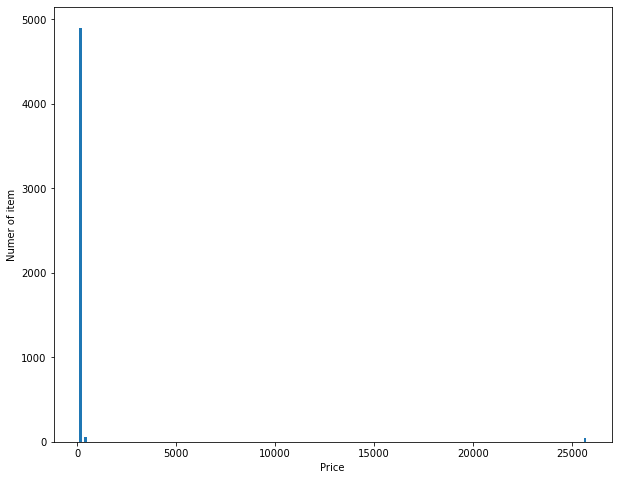

In [4]:
#plotting the distribution of the prices
fig, ax = plt.subplots(figsize=(10, 8))
#plt.grid()
plt.hist(df['product'],bins=200);
plt.xlabel("Price")
plt.ylabel("Numer of item")
plt.savefig('path/his_of_price_item.pdf')

In [5]:
# print out the statistics
print('min:',min(df['product']),'max:',max(df['product']), 'mean:',np.mean(df['product']),
      'median:',np.median(df['product']), 'mode:',stats.mode(df['product']))

min: 90.0 max: 25725.0 mean: 387.7428 median: 153.0 mode: ModeResult(mode=array([153.]), count=array([256]))


In [6]:
# find multiple modes of the dist
from collections import Counter
data = Counter(df['product'])
my_mode = data.most_common()
#fig, ax = plt.subplots(figsize=(8, 6))
my_mode

[(153.0, 256),
 (160.0, 206),
 (156.0, 197),
 (142.0, 197),
 (164.0, 161),
 (176.0, 152),
 (133.0, 151),
 (130.0, 150),
 (177.0, 148),
 (129.0, 142),
 (112.0, 124),
 (163.0, 122),
 (118.0, 118),
 (181.0, 112),
 (178.0, 109),
 (136.0, 105),
 (187.0, 105),
 (161.0, 101),
 (148.0, 101),
 (173.0, 99),
 (131.0, 97),
 (158.0, 94),
 (128.0, 93),
 (145.0, 92),
 (146.0, 89),
 (134.0, 86),
 (117.0, 77),
 (196.0, 61),
 (138.0, 59),
 (114.0, 59),
 (165.0, 58),
 (116.0, 58),
 (140.0, 55),
 (94.0, 55),
 (195.0, 54),
 (169.0, 54),
 (154.0, 54),
 (147.0, 53),
 (201.0, 53),
 (149.0, 52),
 (127.0, 52),
 (352.0, 51),
 (122.0, 50),
 (184.0, 49),
 (162.0, 48),
 (171.0, 48),
 (132.0, 46),
 (25725.0, 46),
 (193.0, 44),
 (166.0, 43),
 (90.0, 42),
 (155.0, 42),
 (101.0, 42),
 (111.0, 40),
 (144.0, 39),
 (168.0, 39),
 (172.0, 35),
 (190.0, 35)]

In [7]:
# cal AOV
AOV = sum(df['order_amount'])/5000
print(AOV)

3145.128


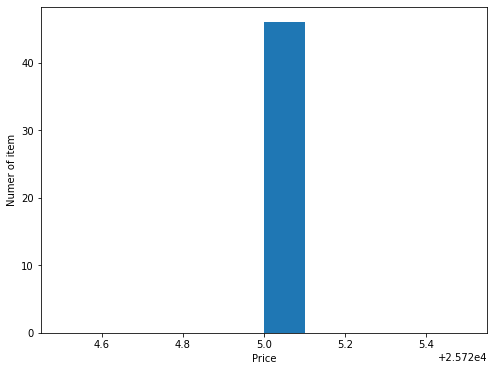

In [8]:
# spliting the data, customers spent on items with price over 25k
product_1 = df['product'][df['product']>=25000 ]

fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(product_1);
plt.xlabel("Price")
plt.ylabel("Numer of item")
plt.savefig('path/exp_item.pdf')

In [9]:
print('min:',min(product_1),'max:',max(product_1), 'mean:',np.mean(product_1),
      'median:',np.median(product_1), 'mode:',stats.mode(product_1))

min: 25725.0 max: 25725.0 mean: 25725.0 median: 25725.0 mode: ModeResult(mode=array([25725.]), count=array([46]))


In [10]:
df_1 = df[df['product']>=25000 ]
AOV = sum(df_1['order_amount'])/df_1['order_amount'].count()
print(AOV)

49213.04347826087


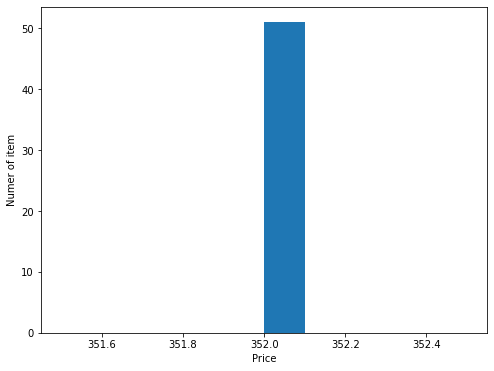

In [11]:
# spliting the data, customers spent on items with price between 250 and 25k
product_b = df['product'][df['product']<25000]
product_2 = product_b[product_b>250]
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(product_2);
plt.xlabel("Price")
plt.ylabel("Numer of item")
plt.savefig('path/med_item.pdf')

In [12]:
# cal stats
print('min:',min(product_2),'max:',max(product_2), 'mean:',np.mean(product_2),
      'median:',np.median(product_2), 'mode:',stats.mode(product_2))

min: 352.0 max: 352.0 mean: 352.0 median: 352.0 mode: ModeResult(mode=array([352.]), count=array([51]))


In [13]:
# cal AOV
product_b = df[df['product']<25000]
df_2 = product_b[product_b['product']>250]

AOV = sum(df_2['order_amount'])/df_2['order_amount'].count()
print(AOV)

235101.49019607843


In [14]:
df_2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,product
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:40.649,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:38.774,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:57.621,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:24.596,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15.136,352.0
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45.330,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:03.570,352.0


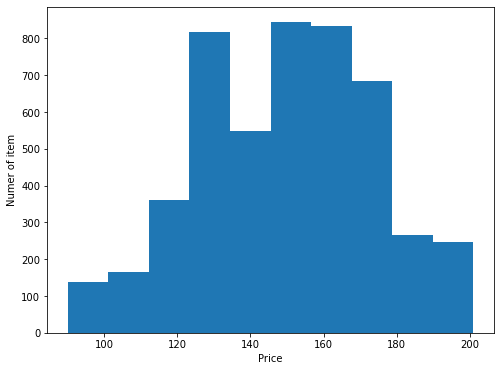

In [15]:
# spliting the data, customers spent on items with less than 250
product_3 = df['product'][df['product'] <= 250]
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(product_3);
plt.xlabel("Price")
plt.ylabel("Numer of item")
plt.savefig('path/cheap_item.pdf')

In [16]:
# cal stats
print('min:',min(product_3),'max:',max(product_3), 'mean:',np.mean(product_3),
      'median:',np.median(product_3), 'mode:',stats.mode(product_3)[0][0])

min: 90.0 max: 201.0 mean: 150.40016316540894 median: 153.0 mode: 153.0


In [17]:
# cal AOV
df_3 =  df[df['product'] <= 250]

AOV = sum(df_3['order_amount'])/df_3['order_amount'].count()
print(AOV)

300.1558229655313
